In [2]:
import numpy as np 
import matplotlib.pyplot as plt      # importing the matplotlib and cv2 for plottig and reading the image file
import cv2

In [4]:
img= cv2.imread("1.jpg")
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, gray_img)
  
#waits for user to press any key 
#(this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 
#cv2_imshow(gray_img)

In [5]:
def Binarypattern(im):                               # creating function to get local binary pattern
    img= np.zeros_like(im)
    n=3                                              # taking kernel of size 3*3
    for i in range(0,im.shape[0]-n):                 # for image height
      for j in range(0,im.shape[1]-n):               # for image width
            x  = im[i:i+n,j:j+n]                     # reading the entire image in 3*3 format
            center       = x[1,1]                    # taking the center value for 3*3 kernel
            img1        = (x >= center)*1.0          # checking if neighbouring values of center value is greater or less than center value
            img1_vector = img1.T.flatten()           # getting the image pixel values 
            img1_vector = np.delete(img1_vector,4)  
            digit = np.where(img1_vector)[0]         
            if len(digit) >= 1:                     # converting the neighbouring pixels according to center pixel value
                num = np.sum(2**digit)              # if n> center assign 1 and if n<center assign 0
            else:                                   # if 1 then multiply by 2^digit and if 0 then making value 0 and aggregating all the values of kernel to get new center value
                num = 0
            img[i+1,j+1] = num
    return(img)

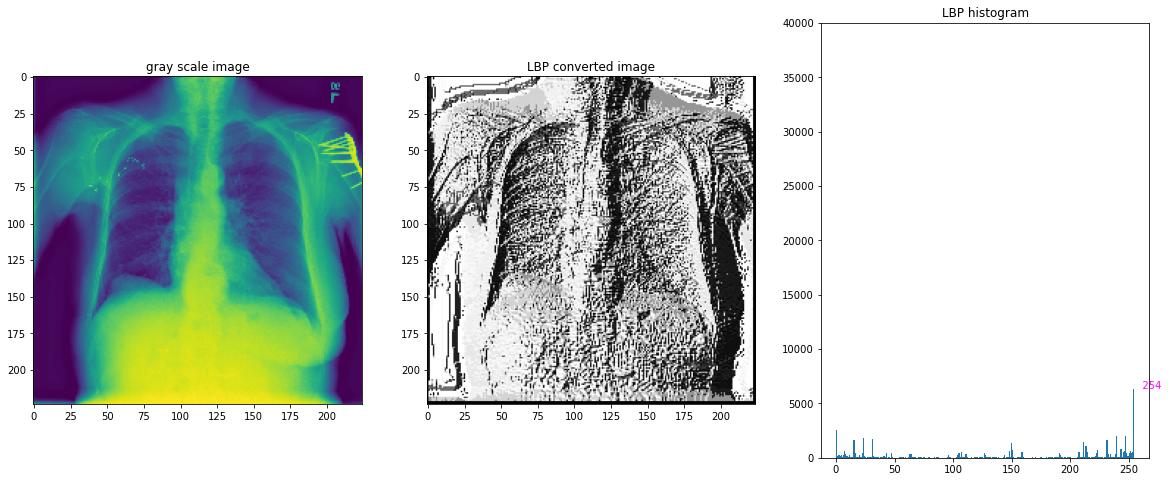

In [6]:
imgLBP=Binarypattern(gray_img)             # calling the LBP function using gray image
vectorLBP = imgLBP.flatten()               # for histogram using the vector form of image pixels
fig=plt.figure(figsize=(20,8))             #subplotting the gray, LBP and histogram 
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_img)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vectorLBP,bins=2**8)       
ax.set_ylim(0,40000)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
     ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()